<a href="https://colab.research.google.com/github/sivaparvathi1234/siva-parvathi_INFO5502_Spring2022/blob/main/lab_assignment_04_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The fourth Lab-assignment (02/17/2022, 50 points in total)

The purpose of this exercise is to understand Exploratory Data Analysis, we will practice the EDA by working on multiple datasets which have different characteristics.

Question 1 (15 points). Understand a text corpus for domain-specific text classification. Download the dataset from the following link: https://osf.io/8mjcy/ . Conduct EDA of the dataset from the following aspects:

(1) How many categories in total?

(2) How many documents under each category?

(3) What is the avergae number of sentence (on average)?

(4) What is the average number of words (on average)?

(5) Visualize the top 50 terms and rank the terms by frquency (remove stop words first: https://gist.github.com/sebleier/554280).

In [86]:
!git clone https://github.com/gantaphani/cases.git

#Importing libraries 
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud, STOPWORDS
from importlib import reload

Cloning into 'cases'...
remote: Enumerating objects: 29482, done.
remote: Counting objects: 100% (29482/29482), done.
remote: Compressing objects: 100% (29481/29481), done.
remote: Total 29482 (delta 0), reused 29482 (delta 0), pack-reused 0
Receiving objects: 100% (29482/29482), 217.55 MiB | 19.04 MiB/s, done.
Checking out files: 100% (29404/29404), done.


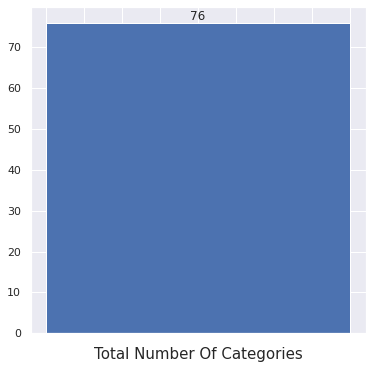

In [92]:
# 1.)

categories=0

#Counting the categories in the respective directory  
for category in os.listdir('/content/cases'):
  if not category.startswith('.git'):
    categories+=1

#Plotting the categories 
plt.figure(figsize=(6,6))
plt.bar(20,categories)
plt.xlabel('Total Number Of Categories',fontsize=15)

ax = plt.gca()
ax.axes.xaxis.set_ticklabels([])
for patch in ax.patches:
    height = patch.get_height()
    width = patch.get_width()
    new_width = width * 1
    patch.set_width(new_width)
    x = patch.get_x()
    patch.set_x(x + (width - new_width) / 2)
    ax.text(x=x + width/2, y=height, s=height, ha='center', va='bottom')

plt.show()

In [93]:
# 2)
for i in ax.patches:
    docs = os.listdir('/content/cases')
    print('In file {} we have {} documents'.format(i,len(docs)))

In file Rectangle(xy=(19.6, 0), width=0.8, height=76, angle=0) we have 77 documents


In [107]:
#3)
totalSentenceCount=0
totalFileCount=0
totalWordCount=0
words=dict()
topWords=''

(pd.read_csv('https://gist.githubusercontent.com/sebleier/554280/raw/7e0e4a1ce04c2bb7bd41089c9821dbcf6d0c786c/NLTK\'s%2520list%2520of%2520english%2520stopwords',sep='\n',header=None)).to_csv('stopwords.txt',sep=',',header=False,index=False)
stopwords=open('/content/stopwords.txt','r').read().strip('\n').split('\n')
def sentenceWordsCount(folder):
    global totalSentenceCount
    global totalFileCount
    global totalWordCount

    for sub in os.listdir(folder):
        path = os.path.join(folder, sub)
        if os.path.isfile(path):
          if sub.startswith('case'):
            data=open(path, 'r').read()
            totalSentenceCount+=len(data.strip('\n').split('.'))
            for sent in data.strip('\n').split('.'):
              for word in sent.split():
                if word in words and word not in stopwords:
                  words[word]+=1
                else:
                  if word not in stopwords:
                    words[word]=1
              totalWordCount+=len(sent.split())
            totalFileCount+=1
        else:
          sentenceWordsCount(path)

sentenceWordsCount('/content/cases')

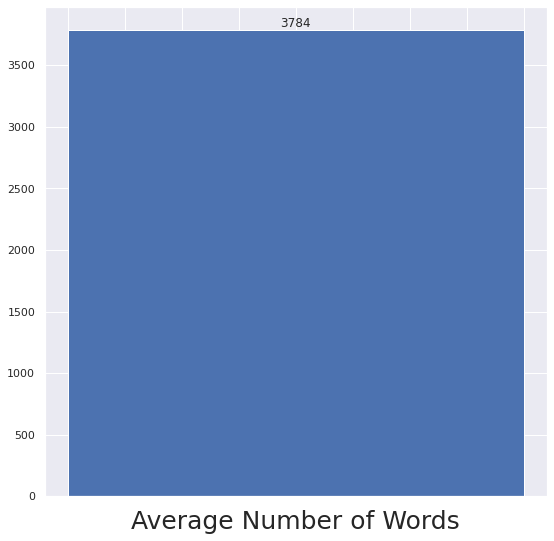

In [106]:
#4)
plt.figure(figsize=(9,9))
plt.bar(20,round(totalWordCount/totalFileCount))
plt.xlabel('Average Number of Words',fontsize=25)

ax = plt.gca()
ax.axes.xaxis.set_ticklabels([])
for patch in ax.patches:
    height = patch.get_height()
    width = patch.get_width()
    new_width = width * 1
    patch.set_width(new_width)
    x = patch.get_x()
    patch.set_x(x + (width - new_width) / 2)
    ax.text(x=x + width/2, y=height, s=height, ha='center', va='bottom')

plt.show()

In [100]:
#5)
import re
import pandas as pd
from stop_words import get_stop_words
from nltk.corpus import stopwords
import nltk
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger') 

# creating a set of stop words that are obtained from STOPWORDS and stop_words
STOPWORDS = set(stopwords.words('english'))
stop_words = list(get_stop_words('en'))
# we combien both sets of stopwords to make a corpus of stopwords
stopwords = list(set(list(STOPWORDS)) | set(list(stop_words)))
stopwords = [re.sub('[^a-zA-Z0-9]+', '', word) for word in stopwords]
print(len(stopwords))
import os

list_of_words = []
path = os.listdir("/content/gdrive/My Drive/preprocessed_cases[cases_29404]")
# we loop through each file and create a list of words
for folder in path:
    docs = os.listdir("/content/gdrive/My Drive/preprocessed_cases[cases_29404]/{}".format((folder)))
    try:
        for file in docs:
            filepath = os.path.join("/content/gdrive/My Drive/preprocessed_cases[cases_29404]", folder, file)
            
            data = pd.read_csv(filepath, sep="\t")
            for col in data.columns:
                data[col] = data[col].str.lower()
                data[col] = data[col].apply(lambda x: re.sub('[^A-Za-z0-9 ]+', '', x))
                data[col] = data[col].apply(lambda x: " ".join(item for item in x.split() if ((item not in stopwords) and (len(item)!= 1))))
                
                for sent in data[col]:
                    list_of_words.extend(sent.split())
       
    except Exception as e:
        print(e)

ModuleNotFoundError: ignored

Question 2 (20 points). Continue practicing how to do simple exploratory data analysis with Python. The dataset that has been used in this question is called Student Academics Performance Data Set, which can be downloaded at: https://github.com/unt-iialab/info5502-spring2022/blob/main/datasets/lab-assignment-04-student-performance.csv . Please conduct the following analysis:

(1) Description of all the columns: for each colmun, count number of rows, number of unqiue element, the frequency of each unqiue element. 


(2)  Visualize the count for each value in the 'Study Hours' column. Note: Study Hours values comes from this >= 6 hours Good >= 4 hours Average < 2 hours Poor.

(3) Using factorplot to show the relationship between numerical and categorical value. Please use figure to show relation between [Study Hours] and [End Semester Percentage]. Percentage is calculated based on the following:

if percentage >=80 then Best
If percentage >= 60 but less than 80 then Very Good
If percentage >= 45 but less than 60 then Good
If Percentage >= 30 but less than 45 then Pass
If Percentage < 30 then Fail

(4) Get the correlation from the data, then plug it to heatmap function and show it as following:


In [82]:
# Your answer here (code + explanation):
# 1.)
import pandas as pd

url = 'https://raw.githubusercontent.com/unt-iialab/info5502-spring2022/main/datasets/lab-assignment-04-student-performance.csv'
df = pd.read_csv(url)

for col in df.columns:
    print("Column:",col)
    # To print the number of rows 
    print("The number of rows :", df[col].shape[0])
# To print the number ofunique columns
    print("The number of unique values in this column :", df[col].value_counts().shape[0])
    print(df[col].value_counts())
    print()





Column: ge
The number of rows : 131
The number of unique values in this column : 2
M    72
F    59
Name: ge, dtype: int64

Column: cst
The number of rows : 131
The number of unique values in this column : 5
OBC     57
G       44
ST      20
MOBC     6
SC       4
Name: cst, dtype: int64

Column: tnp
The number of rows : 131
The number of unique values in this column : 4
Good    59
Vg      38
Pass    25
Best     9
Name: tnp, dtype: int64

Column: twp
The number of rows : 131
The number of unique values in this column : 4
Good    65
Vg      44
Pass    17
Best     5
Name: twp, dtype: int64

Column: iap
The number of rows : 131
The number of unique values in this column : 4
Vg      63
Good    53
Best     8
Pass     7
Name: iap, dtype: int64

Column: esp
The number of rows : 131
The number of unique values in this column : 4
Good    54
Vg      42
Pass    27
Best     8
Name: esp, dtype: int64

Column: arr
The number of rows : 131
The number of unique values in this column : 2
N    78
Y    53
N

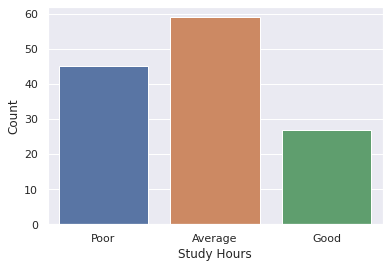

In [83]:
# 2.)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.countplot(df['sh'])
plt.xlabel("Study Hours")
plt.ylabel("Count")
plt.show()

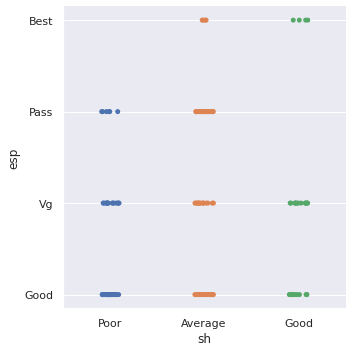

In [84]:
import pandas as pd
import seaborn as sb
from matplotlib import pyplot as plt
#my_df = sb.load_dataset('exercise')
sb.catplot(x = "sh", y = "esp",data = df)
plt.show()

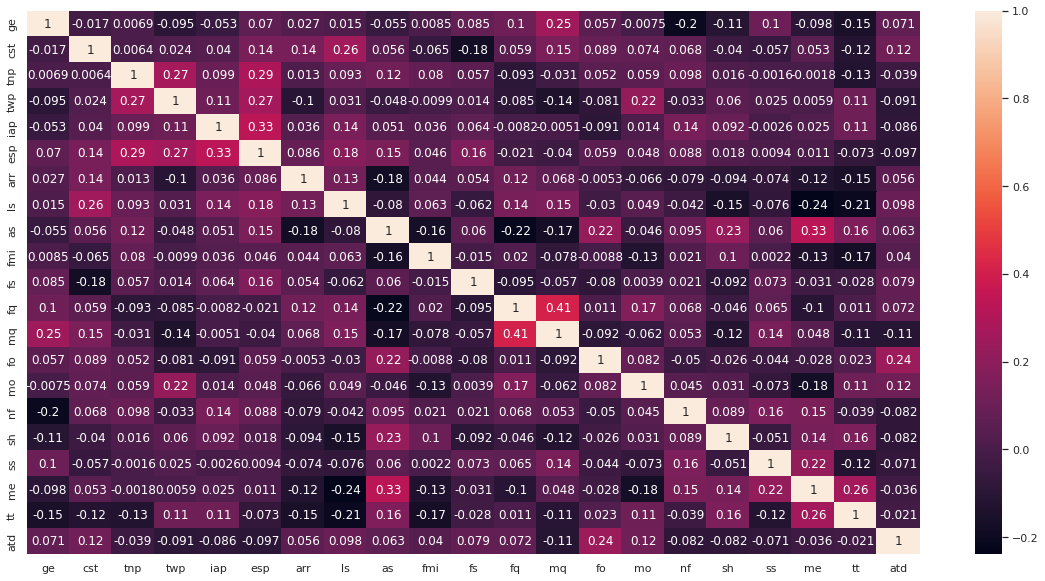

In [85]:
# 4.)
# Import label encoder 
from sklearn import preprocessing
import seaborn as sns
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'Country'. 

#data = label_encoder.fit_transform(df) 
def Encoder(df):
    columnsToEncode = list(df.select_dtypes(include=['category','object']))
    le = preprocessing.LabelEncoder()
    for feature in columnsToEncode:
        try:
            df[feature] = le.fit_transform(df[feature])
        except:
            print('Error encoding '+feature)
    return df

df1 = Encoder(df)
df1 = df1.drop('ms', axis = 1)
corr = df1.corr()
sns.set(rc = {'figure.figsize':(20,10)})
#print(df1.head())
sns.heatmap(corr,annot=True)
#plt.rcParams["figure.figsize"] = (100,20)

plt.show()

Question 3 (15 points). Download a dataset from Kaggle or other sources. Propose three questions that you wanna to know from the dataset, then write python code to conduct EDA analysis to answer the three questions

In [ ]:
# Your three questions:

'''
I chose the following dataset.
. Reading inputs from the file of insurance applications based on sex,age and BMI 

. Analysis based on charges,children,bmi and age?

. Plot between Density vs age



'''

In [65]:
from google.colab import files
uploading = files.upload()

In [66]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as pl
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
data = pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


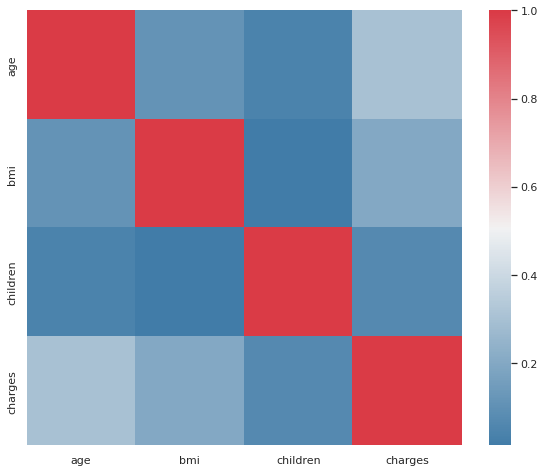

In [67]:
f, ax = pl.subplots(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240,10,as_cmap=True),
            square=True, ax=ax)

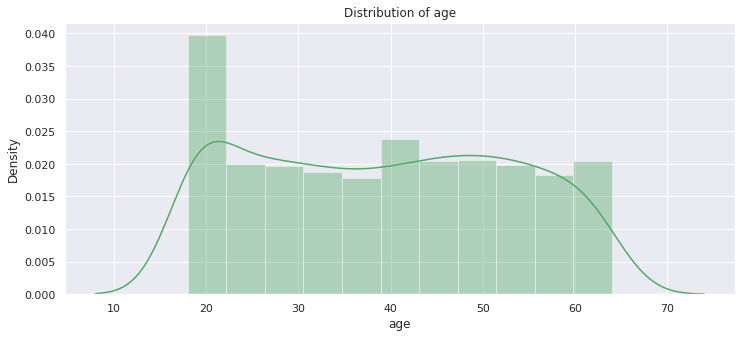

In [68]:
pl.figure(figsize=(12,5))
pl.title("Distribution of age")
ax = sns.distplot(data["age"], color = 'g')